# Sheet 6 - Noise and Kurtosis

Team name: DataFun

Members:

Fabian Frank
Jan Botsch
David Munkacsi

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 6.1 Natural Gradient

In [2]:
#defines
samplerate = 8192
N = 3
p = 18000

## Load sounds and create noise source

In [3]:
#load the data
dataSet1 = np.loadtxt('./sounds/sound1.dat')
dataSet2 = np.loadtxt('./sounds/sound2.dat')
s = np.stack([dataSet1, dataSet2], axis=0)

#create noise data sampled from a Gaussian
mean_data = np.mean(s,axis=1, keepdims=True)
std_data = np.std(s,axis=1, keepdims=True)
dataSet3a = np.random.normal(np.mean(mean_data), np.mean(std_data), p);

#create noise data sampled from a Laplacian
dataSet3b = np.random.laplace(0, 1, p);

#combine the data and the noise
s1 = np.vstack([s, dataSet3a])
s2 = np.vstack([s, dataSet3b])

## Mix the sounds and Preprocess for ICA

In [4]:
# create random and invertible NxN (3x3) matrix
while True:
    A = np.random.rand(N,N)
    if np.linalg.det(A) != 0.0:
        break
print("A=" + str(A))

#mix the sources
x1 = np.matmul(A, s1)
x2 = np.matmul(A, s2)

# remove temporal structure by permutation
permutation = np.random.permutation(range(0,p))
x_per1 = x1[:, permutation]
x_per2 = x2[:, permutation]

#center the permuted data
mean1 = np.mean(x_per1,axis=1, keepdims=True)
x_per_cent1 = x_per1 - mean1;
mean2 = np.mean(x_per2,axis=1, keepdims=True)
x_per_cent2 = x_per2 - mean1;

#center the non-permuted data
x_cent1 = x1 - np.mean(x1,axis=1, keepdims=True)
x_cent2 = x2 - np.mean(x2,axis=1, keepdims=True)


#initialize W at random
while True:
    W_init = np.random.rand(N,N)
    if np.linalg.det(W_init) != 0.0:
        break
print("W_init=" + str(W_init))

A=[[ 0.97268615  0.20175203  0.49389529]
 [ 0.45256546  0.23935491  0.87977084]
 [ 0.19668857  0.30340765  0.5216733 ]]
W_init=[[ 0.41658207  0.80957678  0.87488506]
 [ 0.8769391   0.15934777  0.10339868]
 [ 0.56955387  0.80339588  0.21759403]]


## Perform ICA with decaying conversion rate

In [5]:
#function that calculates f''/f'
def stepSigmoid(y):
    return 1 - 2 * (1 / (1 + np.exp(-y)))

#vectorize function
vStepSigmoid = np.vectorize(stepSigmoid)

def perform_ica(x, W, eps=0.1, f_decay = 0.9995):
    #perform ica
    eps_curr = eps
    convSpeed = np.empty([0,2])
    #for i in range(0,p):
    i=0
    cnt = 0;
    while eps_curr > 0.0000001:
        #natural gradient
        unmixed = np.dot(W,x[:,i])
        dW = np.dot(np.eye(N) + np.outer(vStepSigmoid(unmixed),unmixed), W)
        W = W + eps_curr * dW
        eps_curr = eps_curr * f_decay
        i = (i+1) % p
        cnt = cnt + 1
    return (W, cnt)

W1, iter1 = perform_ica(x_per_cent1, W_init)
print("Iterations=" + str(iter1))
print("Gaussian: W final=" + str(W1))

W2, iter2 = perform_ica(x_per_cent2, W_init)
print("Iterations=" + str(iter2))
print("Laplacian: W final=" + str(W2))

unmixedGaussian = np.matmul(W1, x_cent1)
unmixedLaplacian = np.matmul(W2, x_cent2)

Iterations=27625
Gaussian: W final=[[ -2.95375201   0.90394564   1.25318369]
 [  1.52902038  -4.26105769   2.34741632]
 [ -1.10202689   7.12579531 -10.9882828 ]]
Iterations=27625
Laplacian: W final=[[ -1.15094434   3.2722777   -1.81358166]
 [ -2.96058919   0.92555986   1.23863612]
 [ -1.0968466    7.11336154 -10.98143425]]


## Plot original, mixed and unmixed for Gaussian

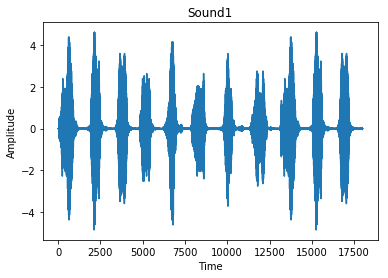

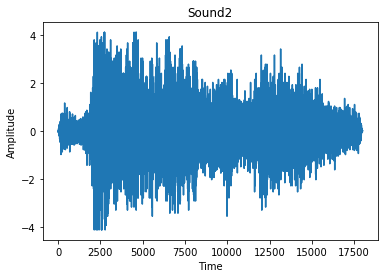

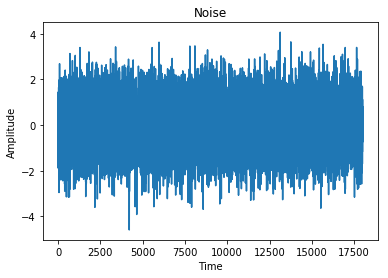

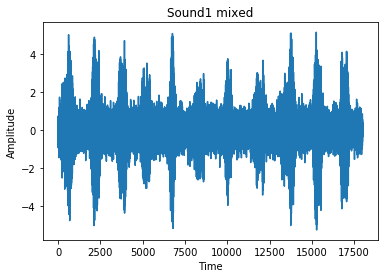

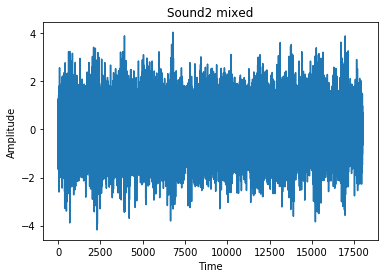

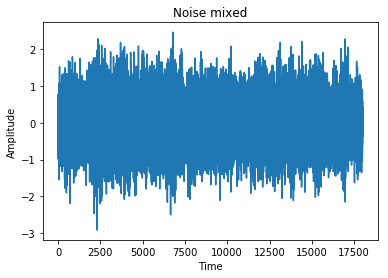

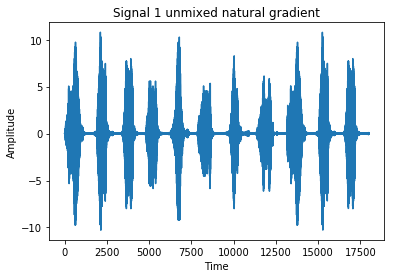

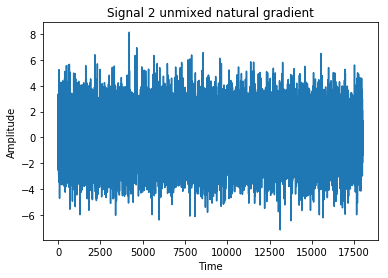

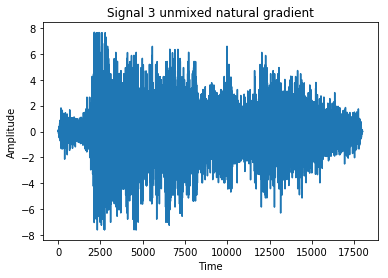

In [6]:
plt.figure()
plt.plot(dataSet1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1')
plt.figure()
plt.plot(dataSet2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2')
plt.figure()
plt.plot(dataSet3a)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise')

plt.figure()
plt.plot(x1[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 mixed')
plt.figure()
plt.plot(x1[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 mixed')
plt.figure()
plt.plot(x1[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise mixed')

plt.figure()
plt.plot(unmixedGaussian[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 1 unmixed natural gradient')
plt.figure()
plt.plot(unmixedGaussian[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 2 unmixed natural gradient')
plt.figure()
plt.plot(unmixedGaussian[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 3 unmixed natural gradient')

plt.show()

## Plot original, mixed and unmixed for Laplacian

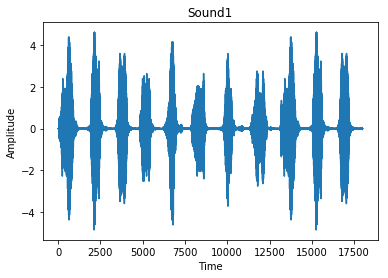

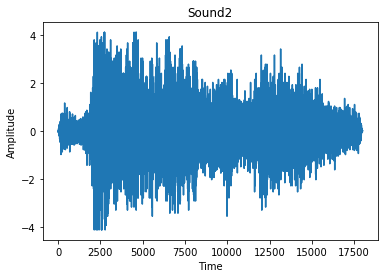

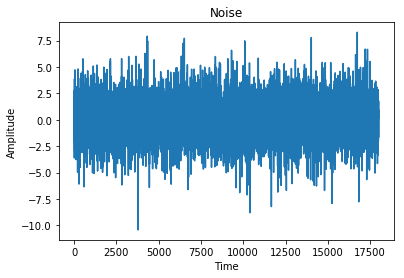

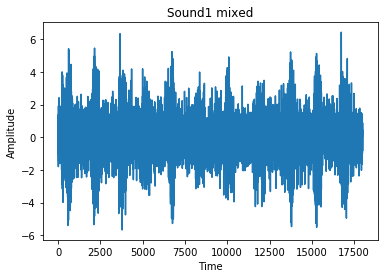

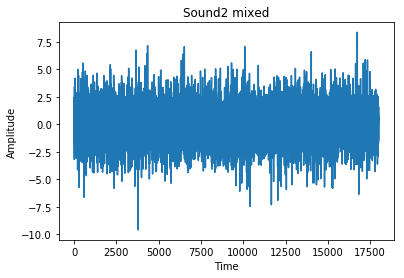

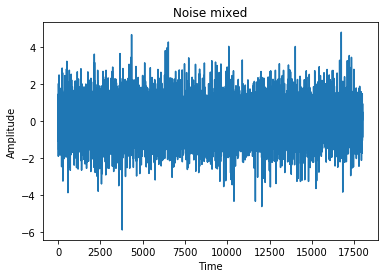

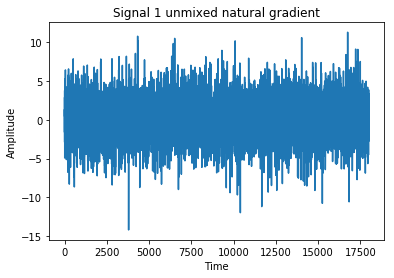

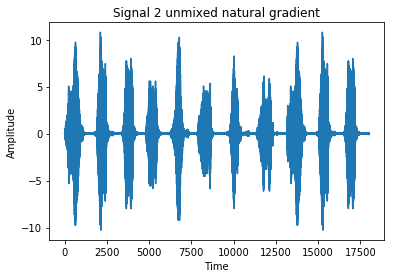

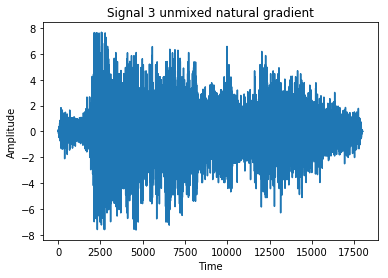

In [7]:
plt.figure()
plt.plot(dataSet1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1')
plt.figure()
plt.plot(dataSet2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2')
plt.figure()
plt.plot(dataSet3b)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise')

plt.figure()
plt.plot(x2[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound1 mixed')
plt.figure()
plt.plot(x2[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound2 mixed')
plt.figure()
plt.plot(x2[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise mixed')

plt.figure()
plt.plot(unmixedLaplacian[0,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 1 unmixed natural gradient')
plt.figure()
plt.plot(unmixedLaplacian[1,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 2 unmixed natural gradient')
plt.figure()
plt.plot(unmixedLaplacian[2,:])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal 3 unmixed natural gradient')

plt.show()

## 6.2 Moments of univariate distributions

a) Laplace Distributon

Moment generating function:

$$ M_x(t) = \frac{e^{\mu t}}{1-\sigma^2t^2} $$

First moment (derivating one time and setting t to null)

$$ \dots = \frac{e^{\mu t}(\mu - \mu \sigma^2 t^2 + 2\sigma^2 + t)}{(1-\sigma^2 t^2)^2} \vert_{t=0} = \mu $$

Second moment

$$ \dots = \frac{4 σ^2 t e^{μ t} (μ - μ σ^2 t^2 + 2 σ^2 t))}{(1 - σ^2 t^2)^3} + \frac{e^{μ t} (2 σ^2 - 2 μ σ^2 t)}{(1 - σ^2 t^2)^2} + \frac{μ e^{μ t} (μ - μ σ^2 t^2 + 2 σ^2 t)}{(1 - σ^2 t^2)^2} \vert_{t=0} = 2\sigma^2 $$

Third moment

$$ \dots = \mu + 6\mu\sigma^2 $$

Standardized

$$ \dots = \frac{\mu + 6\mu\sigma^2}{(2\sigma^2)^\frac{3}{2}}$$

Fourth moment

$$ \dots = μ^4 + 12 μ^2 σ^2 + 24 σ^4 $$

Standardized:

$$ \dots = \frac{μ^4}{4\sigma^4} + \frac{3 μ^2}{\sigma^2}  + 6 $$

b) Gauss Distribution
Moment generating function:

$$ M_x(t) = exp(\mu t +\frac{\sigma^2 t^2}{2})$$

We get the 1st moment by derivating the generating function and setting $t$ to $0$

$$ \dots = \mu $$

Second moment (derivating the generating function two times and setting t to zero)

$$ \dots = \mu^2 + \sigma^2 $$

Third moment

$$ \dots = \mu^3 + 3\mu\sigma^2 $$

Standardized:

$$ \dots = \frac{\mu^3 + 3\mu\sigma^2}{(\mu^2 + \sigma^2)^\frac{3}{2}} $$

Fourth moment

$$ \dots = \mu^4 + 6\mu^2\sigma^2 3\sigma^4 $$

Standardized:

$$ \dots = \frac{\mu^4 + 6\mu^2\sigma^2 3\sigma^4}{(\mu^2 + \sigma^2)^2} $$

c) Uniform Distribution

Moment generating function: $$ M_x = E(e^{t x}) = \int_{a}^{b} e^{t x} \frac{1}{b-a} = \frac{1}{b-a} \left[ \frac{e^{t x}}{t}\right]_a^b = \frac{e^{t b} - e^{t a}}{t (b-a)} = \frac{1}{t(b-a)} \left[ bt + \frac{(bt)^2}{2!} + \frac{(bt)^3}{3!} - \left( at + \frac{(at)^2}{2!} + \frac{(at)^3}{3!} \right) \right] = \frac{1}{(b-a)} \left[ b + \frac{b^2 t}{2!} + \frac{b^3 t^2}{3!} - \left( a + \frac{a^2 t}{2!} + \frac{a^3 t^2}{3!} \right) \right] $$ 

We get the 1st moment by derivating $M_x$ one time and setting $t$ to $0$:
$$ \dots = \frac{1}{(b-a)} \left[ \frac{b^2}{2!} - \frac{a^2}{2!} \right] = \frac{b+a}{2} $$

We get the 2nd moment by derivating $M_x$ two times and setting $t$ to $0$:
$$ \dots = \frac{1}{(b-a)} \left[ \frac{b^3}{3} - \frac{a^3}{3} \right] = \frac{b^3-a^3}{3(b-a)} = \frac{b^2 +ba + a^2}{3} $$

We get the 3rd moment by derivating $M_x$ three times and setting $t$ to $0$:
$$ \dots = \frac{1}{(b-a)} \left[ \frac{b^4}{4} - \frac{a^4}{4} \right] = \frac{b^4-a^4}{4(b-a)} $$

Hence the 3rd standardized moment is
$$ \frac{\frac{b^4-a^4}{4(b-a)}}{\left(\frac{b^3-a^3}{3(b-a)}\right)^{\frac{3}{2}}} = \frac{b^4-a^4}{4(b-a)} \left(\frac{3(b-a)}{b^3-a^3}\right)^{\frac{2}{3}}  $$

We get the 4th moment by derivating $M_x$ four times and setting $t$ to $0$:
$$ \dots = \frac{1}{(b-a)} \left[ \frac{b^5}{5} - \frac{a^5}{5} \right] = \frac{b^5-a^5}{5(b-a)} $$

Hence the 3rd standardized moment is
$$ \frac{\frac{b^5-a^5}{5(b-a)}}{\left(\frac{b^3-a^3}{3(b-a)}\right)^{\frac{4}{2}}} = \frac{b^5-a^5}{5(b-a)} \left(\frac{3(b-a)}{b^3-a^3}\right)^{2} = \frac{9 (b^5-a^5) (b-a)}{5 (b^3-a^3)^2}  $$

| | Laplace $(\mu,b)$ | Gauss $(\mu,\sigma)$ | Uniform $(a,b)$ |
| ------------- |:-------------:| :-------------:|:-------------:|
| mean: first moment $\langle X \rangle$ | $$\mu$$ | $$ \mu $$ | $\frac{b+a}{2}$ |
| variance: second centered moment $\langle X \rangle^2_c$ | $$ 2\sigma^2$$ | $$ \mu + \sigma $$ |$\frac{b^2 +ba + a^2}{3}$ |
| skewness: third standardized moment $\langle X \rangle^3_s$ | $\frac{\mu + 6\mu\sigma^2}{(2\sigma^2)^\frac{3}{2}}$| $$ \frac{\mu^3 + 3\mu\sigma^2}{(\mu^2 + \sigma^2)^\frac{3}{2}} $$ | $\frac{b^4-a^4}{4(b-a)} \left(\frac{3(b-a)}{b^3-a^3}\right)^{\frac{2}{3}}$ |
| kurtosis: fourth standardized moment $\langle X \rangle^4_s$ | $ \frac{μ^4}{4\sigma^4} + \frac{3 μ^2}{\sigma^2}  + 6 $ | $$\frac{\mu^4 + 6\mu^2\sigma^2 3\sigma^4}{(\mu^2 + \sigma^2)^2}$$| $\frac{9 (b^5-a^5) (b-a)}{5 (b^3-a^3)^2}$ |

$$ \langle X^i \rangle_c = \langle(X-\langle X \rangle)^i\rangle $$
$$ \langle X^i \rangle_s = \frac{\langle X^i \rangle_c}{\langle X^2 \rangle^{i/2}_c}$$ 

## 6.3 Kurtosis

Normal


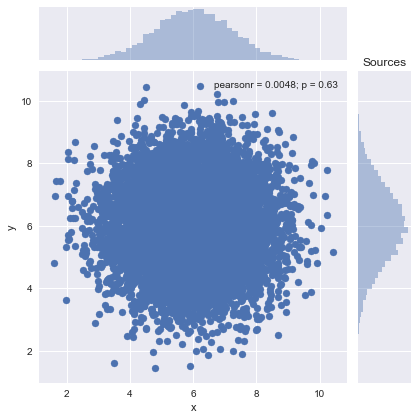

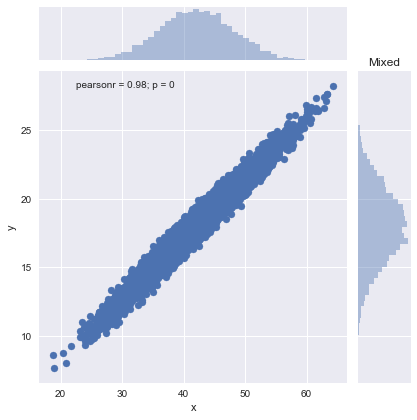

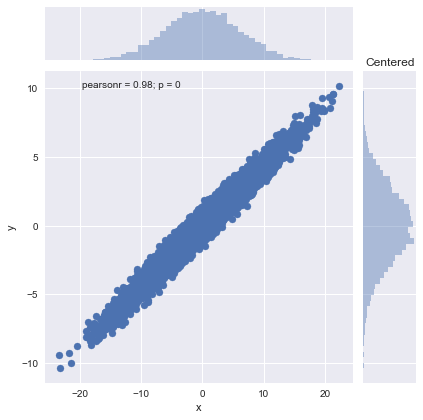

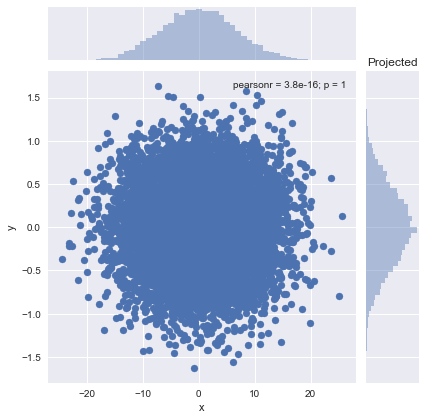

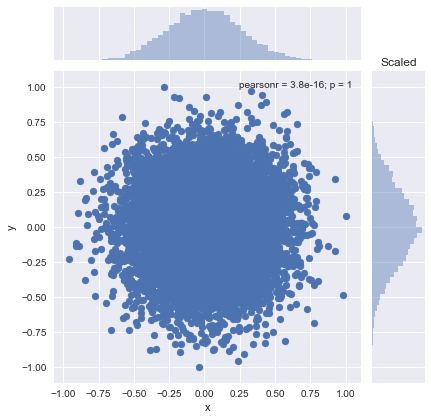

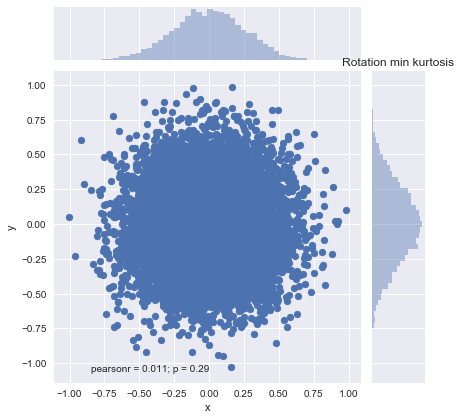

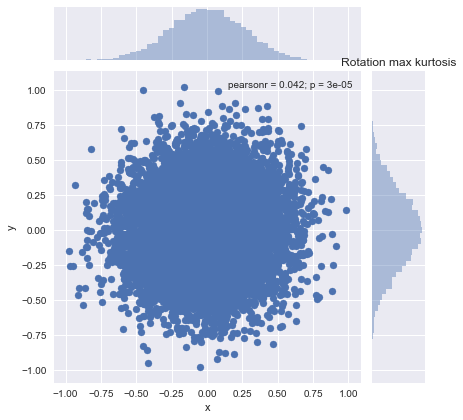

Uniform


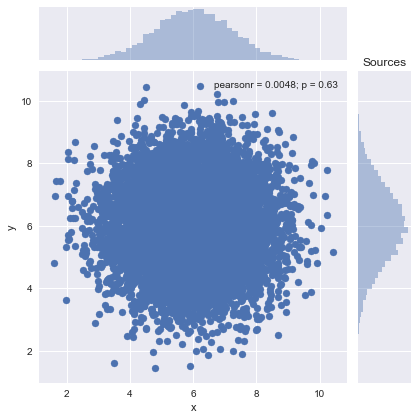

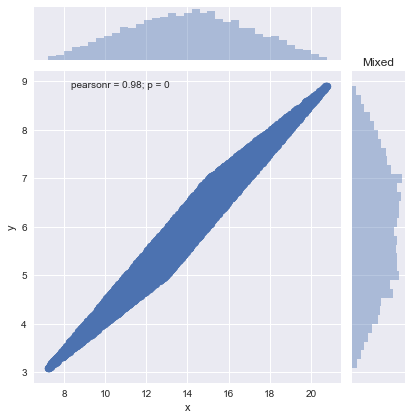

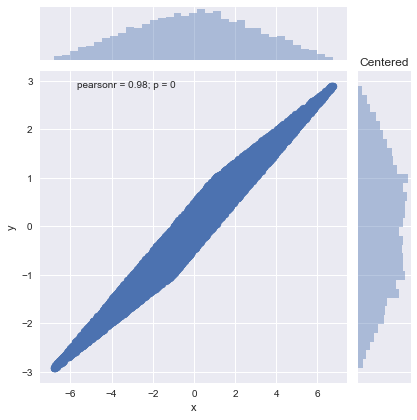

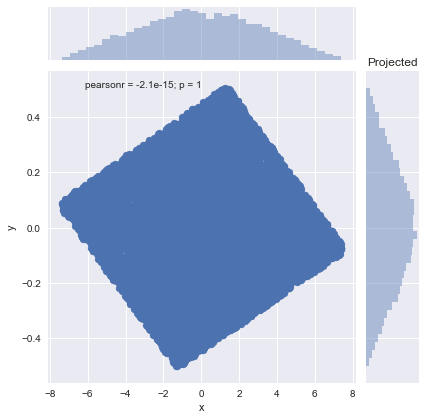

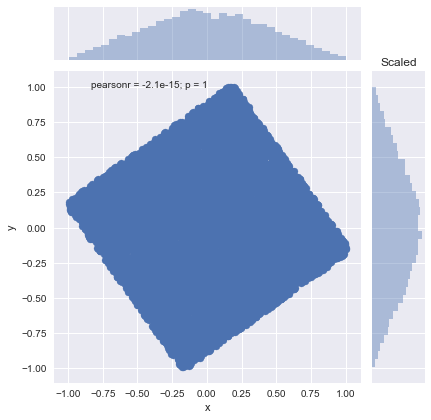

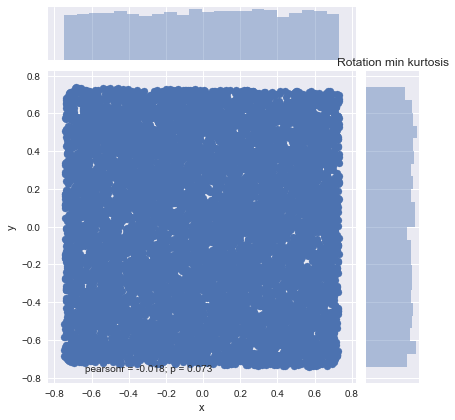

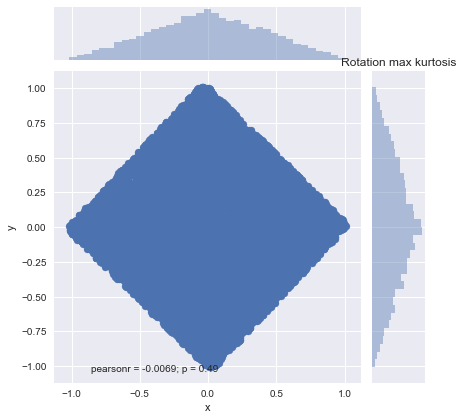

Laplacian


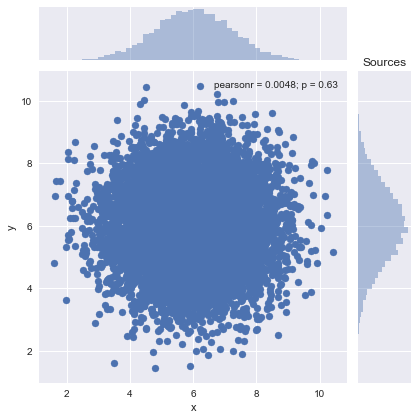

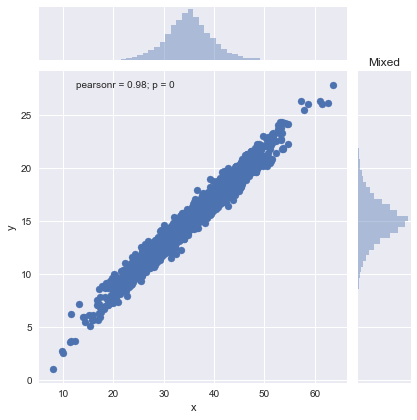

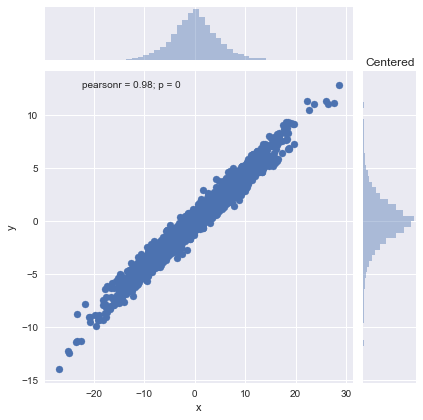

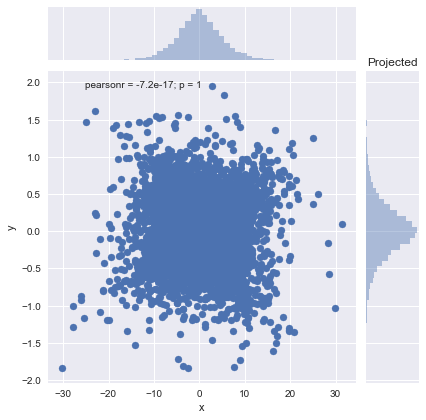

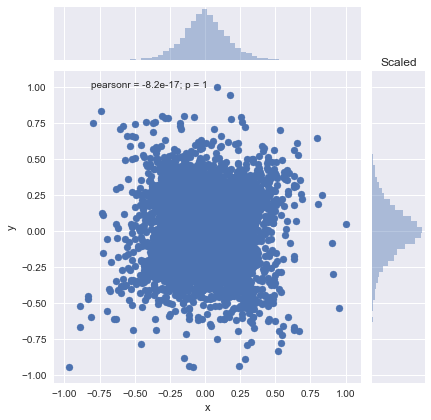

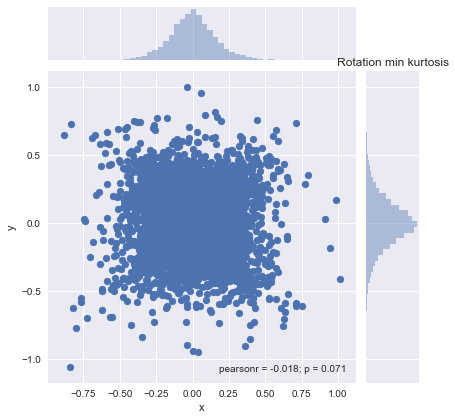

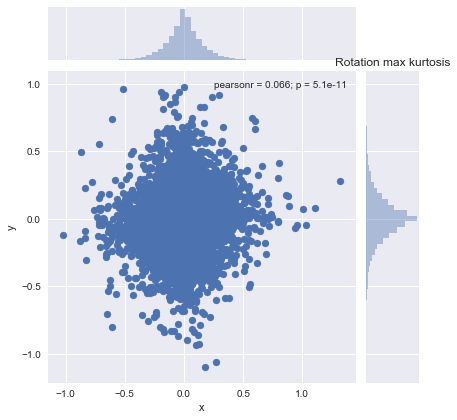

In [8]:
import numpy as np
import scipy as scipy
import scipy.io as io
from sklearn.decomposition import PCA
from sklearn import preprocessing as pre
import math
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd

#load data from mat file
distrib = io.loadmat("distrib.mat")

normal = distrib.get("normal")
uniform = distrib.get("uniform")
laplacian = distrib.get("laplacian")

# a) apply mixing
def mix(x):
    A = np.asarray([[4,3],[2,1]])
    return np.dot(A,x)

# b) center to zero mean 
def center(x):
    return x - x.mean(axis=1, keepdims=True)

# c) apply PCA and project data onto PC
def applyPCA(x):
    pca = PCA()
    pca.fit(x)
    return pca.transform(x)

# d) scale data to unit variance
def scale(x):
    return pre.maxabs_scale(x)

# e rotate data
def rotate(x, angle): # x of shape (2,n)
    R = np.asarray([[math.cos(angle), -math.sin(angle)],[math.sin(angle), math.cos(angle)]])
    return np.dot(R, x)

def rotateAndGetKurtosis(x, angle):
    scaledRot = rotate(x.T, angle).T
    kurt = scipy.stats.kurtosis(scaledRot)    
    #print("kurt: ", kurt)
    return kurt

def findMinAndMaxKurt(x, angles):
    kurts = np.empty((angles.shape[0],2))
    idx = 0
    for angle in angles:
        kurt = rotateAndGetKurtosis(x, angle)
        kurts[idx] = kurt
        idx += 1
    
    maxIdx = np.argmax(kurts[:,0])
    minIdx = np.argmin(kurts[:,1])
    return maxIdx, minIdx

def plotdata(source, mixed, centered, projected, scaled, rotMin, rotMax):    
    # Plotting the results.
 
    df = pd.DataFrame(source, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Sources')
    
    df = pd.DataFrame(mixed, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Mixed')
    
    df = pd.DataFrame(centered, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Centered')
    
    df = pd.DataFrame(projected, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Projected')
    
    df = pd.DataFrame(scaled, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Scaled')
    
    df = pd.DataFrame(rotMin, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Rotation min kurtosis')
    
    df = pd.DataFrame(rotMax, columns=["x", "y"])
    sea.jointplot(x="x", y="y", data=df)
    plt.title('Rotation max kurtosis')

def runExercise(x):
    xNormal = mix(x)
    xNormalCentered = center(xNormal)
    # transpose data for further processing
    xNormalCentered = xNormalCentered.T
    
    projectedNormalCentered = applyPCA(xNormalCentered)
    scaledNormal = scale(projectedNormalCentered)
    
    angles = np.arange(0, 2, 1/50)
    angles = angles * math.pi
    maxIdx, minIdx = findMinAndMaxKurt(scaledNormal, angles)
    
    rotNormMax = rotate(scaledNormal.T, angles[maxIdx])
    rotNormMin = rotate(scaledNormal.T, angles[minIdx])
    
    plotdata(normal.T, xNormal.T, xNormalCentered, projectedNormalCentered, scaledNormal, rotNormMin.T, rotNormMax.T)
    plt.show()

print("Normal")
runExercise(normal)
print("Uniform")
runExercise(uniform)
print("Laplacian")
runExercise(laplacian)